# Figures of the paper "Characterization of internal tides in a realistic simulation"

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from scipy import fft
import seaborn as sns
import pandas as pd

In [2]:
import matplotlib as mpl
mpl.rcParams["font.size"]=15

In [3]:
# definition of root paths
root_dir = '/Users/zcaspar/codes/mit4320/'
fig_dir = '/Users/zcaspar/Documents/Figures_paper2/'

### Figure 2 :

In [4]:
#Load extracted local data (here polynesia)
ds = xr.open_dataset(root_dir+'Eulerian_data_polynesia.nc')
#ds = xr.open_dataset(root_dir+'local_distribution_Atl.nc')

#dsL_demod = pd.read_parquet(root_dir+'Lagrangian_data_polynesia')
#dsL = pd.read_parquet(root_dir+'Lagrangian_datamean_149W8S')


In [43]:
test.shape

(33, 5)

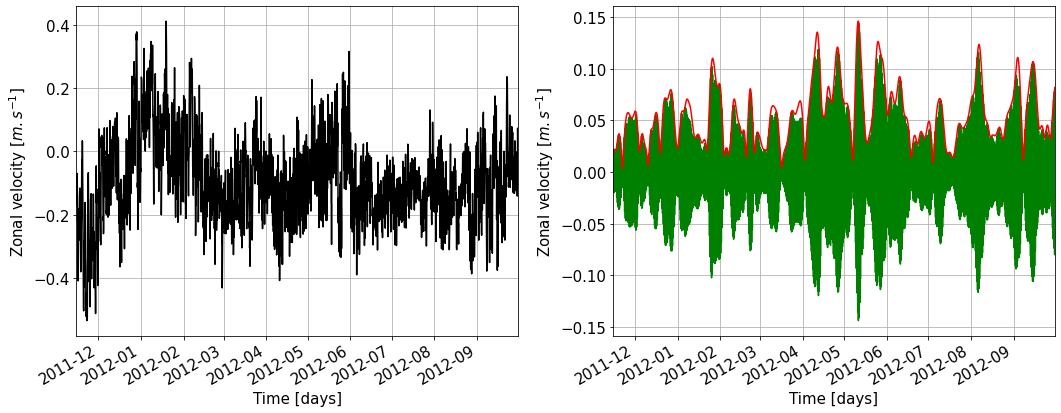

In [55]:
#Selection of one grid point and plot of velocity time series:

fig,axs = plt.subplots(1,2,figsize=(15,6))
ds.SSU_rot.isel(lon=10,lat=15).plot(ax=axs[0],c='k')
ds.SSU_rot_hat_real.isel(lon=10,lat=15).plot(ax=axs[1],c='g')
np.abs(ds.SSU_rot_demodulated_real+1j*ds.SSU_rot_demodulated_imag).isel(lon=10,lat=15).plot(ax=axs[1],c='r')

for ax in axs:
    ax.grid();
    ax.set_ylabel('Zonal velocity [$m.s^{-1}$]');
    ax.set_title('');ax.set_xlabel('Time [days]')
    ax.set_xlim(ds.time[0],ds.time[-1])
fig.tight_layout()
#fig.savefig(fig_dir+'Etimeseries.pdf')



In [5]:
#Load energy files
ds_dl1 = xr.merge([xr.open_dataset(root_dir+'energy_SSU_hf_binned_dl1.0.nc'),
                   xr.open_dataset(root_dir+'energy_SSV_hf_binned_dl1.0.nc'),
                   xr.open_dataset(root_dir+'energy_hf_binned_dl1.0.nc')])
ds_hf = ds_dl1.where(ds_dl1.waterdepth>500)

ds_dl2 = xr.merge([xr.open_dataset(root_dir+'energy_SSU_hf_binned_dl2.0.nc'),
                   xr.open_dataset(root_dir+'energy_SSV_hf_binned_dl2.0.nc'),
#                   xr.open_dataset(root_dir+'energy_hf_binned_dl2.0.nc')
                  ])
ds_hf_dl2 = ds_dl2.where(ds_dl2.waterdepth>500)


ds_low_dl1 = xr.merge([xr.open_dataset(root_dir+'energy_SSU_low_binned_dl1.0.nc'),
                       xr.open_dataset(root_dir+'energy_SSV_low_binned_dl1.0.nc'),
                       xr.open_dataset(root_dir+'energy_low_binned_dl1.0.nc')])

ds_low_dl1 = ds_low_dl1.where(ds_low_dl1.waterdepth>500)

In [7]:
ds_low_dl1

<xarray.Dataset>
Dimensions:       (lon_bin: 359, lat_bin: 119)
Coordinates:
  * lon_bin       (lon_bin) float64 -179.5 -178.5 -177.5 ... 176.5 177.5 178.5
  * lat_bin       (lat_bin) float64 -59.5 -58.5 -57.5 -56.5 ... 56.5 57.5 58.5
Data variables:
    E_count       (lon_bin, lat_bin) float64 288.0 276.0 276.0 ... 252.0 251.0
    E_energy_SSU  (lon_bin, lat_bin) float64 0.05613 0.06514 ... 0.0109 0.01285
    L_energy_SSU  (lon_bin, lat_bin) float64 0.006527 0.01185 ... 0.01386
    waterdepth    (lon_bin, lat_bin) float64 4.347e+03 4.968e+03 ... 3.745e+03
    L_count       (lon_bin, lat_bin) float64 217.0 215.0 ... 6.38e+03 2.066e+03
    E_energy_SSV  (lon_bin, lat_bin) float64 0.03286 0.02243 ... 0.006503
    L_energy_SSV  (lon_bin, lat_bin) float64 0.01085 0.012 ... 0.009337 0.008723
    E_energy      (lon_bin, lat_bin) float64 0.08899 0.08757 ... 0.01737 0.01935
    L_energy      (lon_bin, lat_bin) float64 0.01738 0.02385 ... 0.01968 0.02258

In [6]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
def plot_maps(ds,colmap='RdBu_r',vlim=(-0.01,0.01),axes=111,lat='lat_bin',**kwargs):
    """
    Plot maps of a given xarray.
    ----------------------------------------------
    Parameters:
    ds : xarray, 2D variable
    colmap : colormap to use in the plot (see list of colormaps on matplotlib), default is 'RdBu_r'
    vlim : tuple, limits of the colorbar (vmin, vmax)
    axes : subplots definition, default is one figure (111)
    lat : str, name of the latitude axis, default is 'lat_bin'
    kwargs : dict, properties of the colorbar (example: {'orientation':'horizontal'})
    """
    crs = ccrs.Robinson()
    #fig = plt.figure(figsize=figsize)
    cbar_kwargs = {'fraction':0.02}
    cbar_kwargs.update(**kwargs)
    ax = fig.add_subplot(axes,projection=crs)
    ds.plot(vmax=vlim[1],vmin=vlim[0],y=lat,ax=ax,
            transform=ccrs.PlateCarree(),cmap=colmap,label=False,#**kwargs,
            cbar_kwargs=cbar_kwargs) #{'fraction':0.02,'label':'energy'}
    ax.gridlines(draw_labels=True)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.LAND)
    return fig,ax

### Figure 1 : Maps of mean low frequency energy and number of drifters per bin

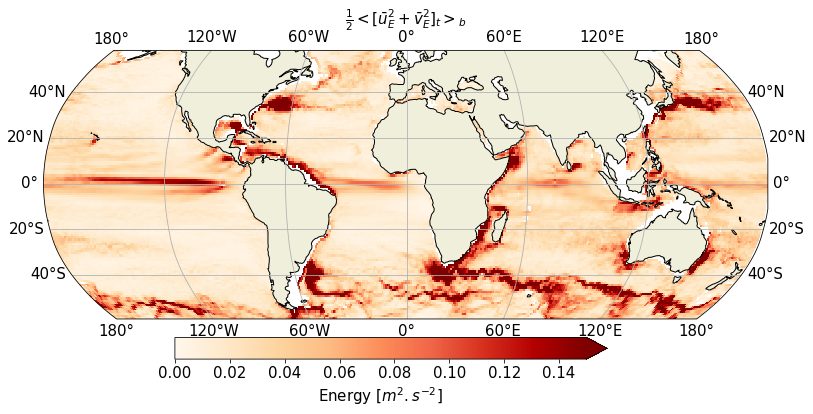

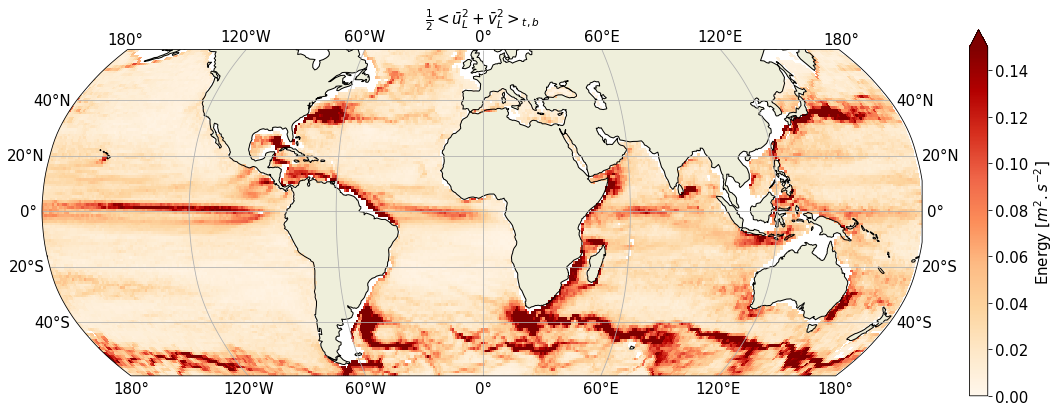

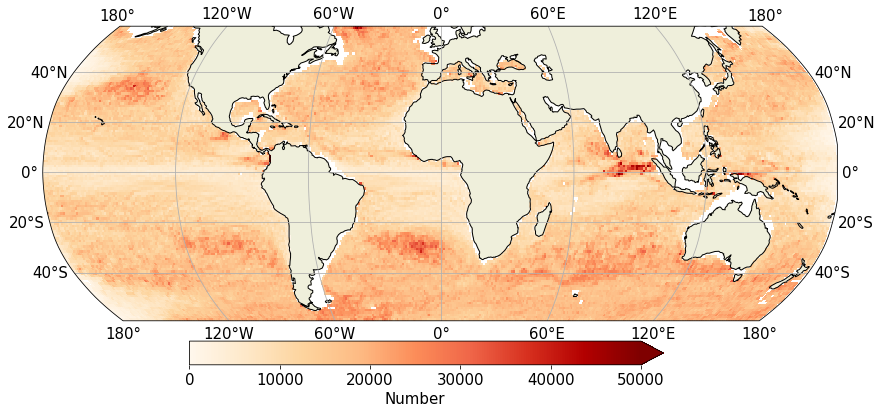

In [37]:
figsize = (15,6)
cmap = 'OrRd'
fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(0.5*ds_low_dl1.E_energy,colmap=cmap,vlim=(0,0.15),
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':r'Energy [$m^2.s^{-2}$]'})
ax.set_title(r'$\frac{1}{2}<[\bar{u}_E^2+\bar{v}_E^2]_t>_b$',size=15)
fig.tight_layout()
fig.savefig(fig_dir+'E_energy_low.png',bbox_inches='tight')

fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(0.5*ds_low_dl1.L_energy,colmap=cmap,vlim=(0,0.15),**{'label':r'Energy [$m^2.s^{-2}$]'})
ax.set_title(r'$\frac{1}{2}<\bar{u}_L^2+\bar{v}_L^2>_{t,b}$',size=15)
fig.tight_layout()
fig.savefig(fig_dir+'L_energy_low.png',bbox_inches='tight')

fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(ds_low_dl1.L_count,colmap=cmap,vlim=(0,50000),
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':r'Number'})
ax.set_title(r'',size=15)
fig.tight_layout()
fig.savefig(fig_dir+'Nb_drifters.png',bbox_inches='tight')

### Figure 3 : Maps of energy in the semidiurnal band estimated from demodulated filtered velocity fields
1) Eulerian energy levels

2) Lagrangian energy levels

### Figure 4 : Map of energy ratio (Lagrangian over Eulerian)

3) Lagrangian over Eulerian energy : 2 isolines of low fequency energy are plotted (red=0.1, black=0.02)

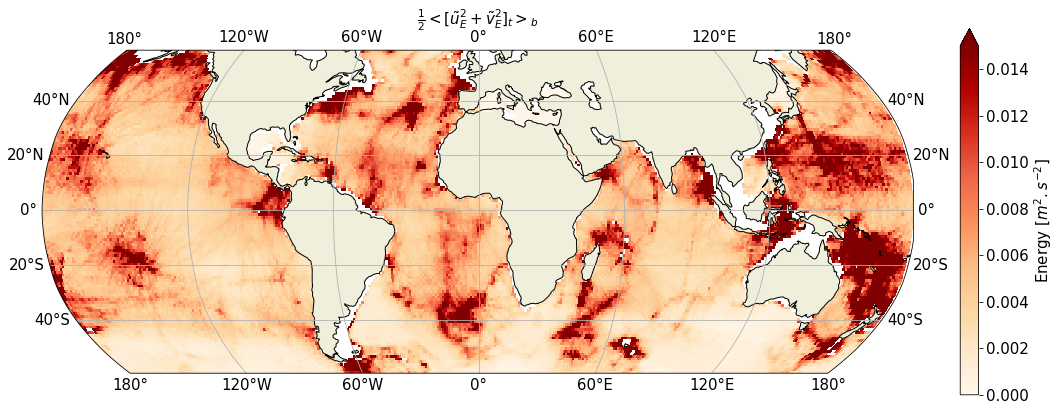

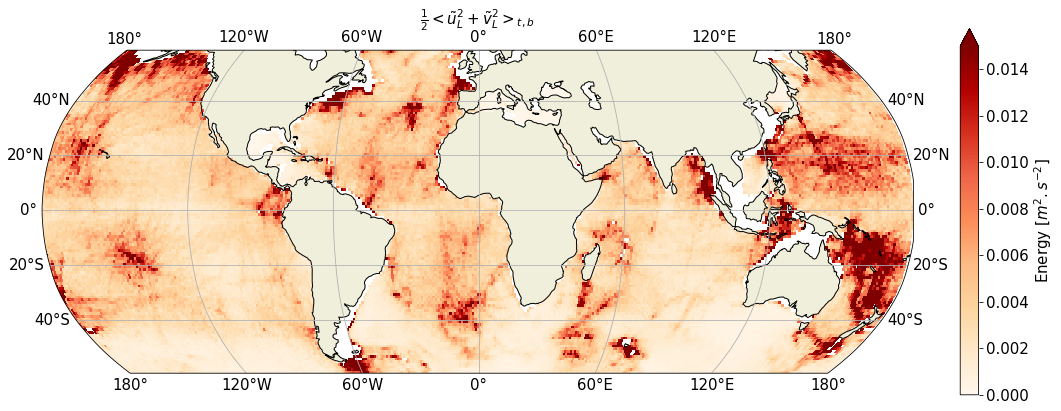

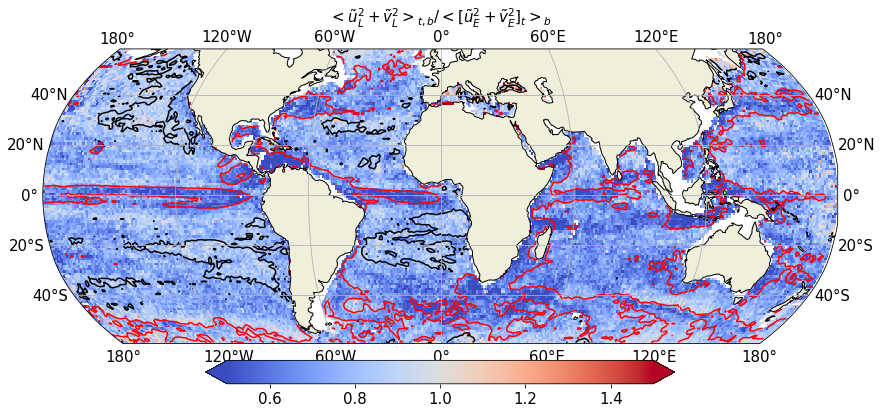

In [9]:
figsize = (15,6)
cmap = 'OrRd'
fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(0.5*ds_hf.E_energy,colmap=cmap,vlim=(0,0.015),**{'label':r'Energy [$m^2.s^{-2}$]'})
ax.set_title(r'$\frac{1}{2}<[\tilde{u}_E^2+\tilde{v}_E^2]_t>_b$',size=15)
fig.tight_layout()
fig.savefig(fig_dir+'E_energy_hf.png',bbox_inches='tight')

fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(0.5*ds_hf.L_energy,colmap=cmap,vlim=(0,0.015),**{'label':r'Energy [$m^2.s^{-2}$]'})
ax.set_title(r'$\frac{1}{2}<\tilde{u}_L^2+\tilde{v}_L^2>_{t,b}$',size=15)
fig.tight_layout()
fig.savefig(fig_dir+'L_energy_hf.png',bbox_inches='tight')

fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(ds_hf.L_energy/ds_hf.E_energy,colmap='coolwarm',vlim=(0.5,1.5),
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.05,'label':''})
(ds_low_dl1.L_energy).plot.contour(ax=ax,transform=ccrs.PlateCarree(),
                                     y='lat_bin',levels=[0.02,0.1],colors=['black','red'])
ax.set_title(r'$<\tilde{u}_L^2+\tilde{v}_L^2>_{t,b}/<[\tilde{u}_E^2+\tilde{v}_E^2]_t>_b$'
             ,size=15)
fig.tight_layout()
fig.savefig(fig_dir+'LE_energy_hf.png',bbox_inches='tight')


### Figure 4 : Joint pdf of energy levels

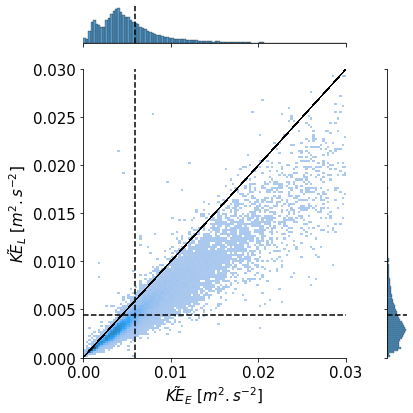

In [10]:

El = 0.5*ds_hf.L_energy
Ee = 0.5*ds_hf.E_energy
#sns.jointplot(x=Te.values.flatten(),y=Tl.values.flatten(),kind='kde',xlim=(2,100),ylim=(2,100))
axs = sns.jointplot(x=Ee.values.flatten(),y=El.values.flatten(),kind='hist',xlim=(0,0.03),ylim=(0,0.03))
axs.set_axis_labels(r'$\tilde{KE}_E$ [$m^2.s^{-2}$]',r'$\tilde{KE}_L$ [$m^2.s^{-2}$]')
for ax in (axs.ax_joint, axs.ax_marg_x):
    ax.axvline(axs.x[axs.x<0.03].mean(), color='k', ls='--', lw=1.5)
for ax in (axs.ax_joint, axs.ax_marg_y):
    ax.axhline(axs.y[axs.y<0.03].mean(), color='k', ls='--', lw=1.5)
for ax in (axs.ax_joint, axs.ax_marg_x):
    ax.plot(axs.x.values,axs.x.values, c='k', lw=0.5)
fig = axs.fig
fig.tight_layout()
fig.savefig(fig_dir+'LE_energy_jointpdf.png')

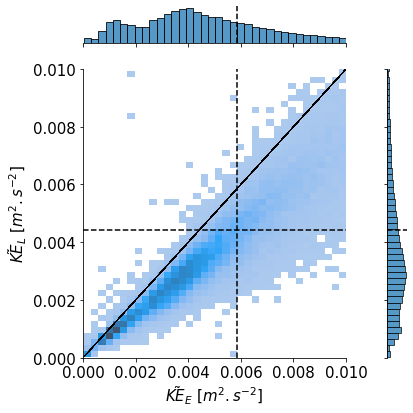

In [21]:
# Zoom of previous figure (paper version)
axs = sns.jointplot(x=Ee.values.flatten(),y=El.values.flatten(),kind='hist',xlim=(0,0.01),ylim=(0,0.01))
axs.set_axis_labels(r'$\tilde{KE}_E$ [$m^2.s^{-2}$]',r'$\tilde{KE}_L$ [$m^2.s^{-2}$]')
for ax in (axs.ax_joint, axs.ax_marg_x):
    ax.axvline(axs.x[axs.x<0.03].mean(), color='k', ls='--', lw=1.5)
for ax in (axs.ax_joint, axs.ax_marg_y):
    ax.axhline(axs.y[axs.y<0.03].mean(), color='k', ls='--', lw=1.5)
for ax in (axs.ax_joint, axs.ax_marg_x):
    ax.plot(axs.x.values,axs.x.values, c='k', lw=0.5)
#for ax in axs.ax_joint:
#    ax.text(0.007,0.0065,r'$\tilde{KE}_L=\tilde{KE}_E$')
#axs.ax_marg_x.
fig = axs.fig
fig.tight_layout()
fig.savefig(fig_dir+'LE_energy_jointpdf.png')

#### Additional figure 4 : Joint pdf of tidal energy ratio (x-axis) and low frequency Lagrangian energy levels (y-axis)

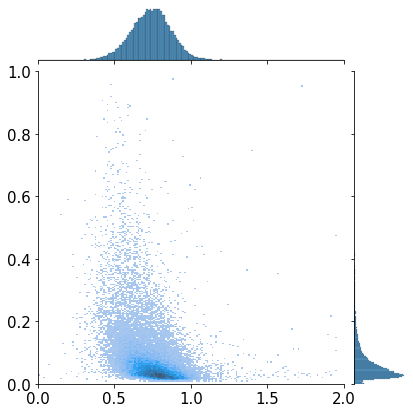

In [65]:
x = ds_hf.L_energy/ds_hf.E_energy
y = ds_low_dl1.L_energy
axs = sns.jointplot(x=x.values.flatten(),y=y.values.flatten(),kind='hist',xlim=(0,2),ylim=(0,1))
#axs.set_axis_labels(r'$\tilde{KE}_E$ [$m^2.s^{-2}$]',r'$\tilde{KE}_L$ [$m^2.s^{-2}$]')
#for ax in (axs.ax_joint, axs.ax_marg_x):
#    ax.axvline(axs.x[axs.x<0.03].mean(), color='k', ls='--', lw=1.5)
#or ax in (axs.ax_joint, axs.ax_marg_y):
#   ax.axhline(axs.y[axs.y<0.03].mean(), color='k', ls='--', lw=1.5)
#for ax in (axs.ax_joint, axs.ax_marg_x):
#    ax.plot(axs.x.values,axs.x.values, c='k', lw=0.5)
#fig = axs.fig
#fig.tight_layout()
#fig.savefig(fig_dir+'LE_energy_jointpdf.png')

### Figure 4 : Distribution of the Lagrangian over Eulerian energy ratio

/opt/anaconda3/envs/croco/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


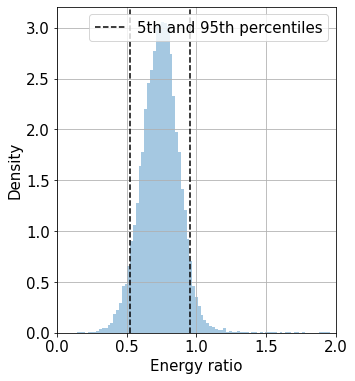

In [46]:
fig,axs = plt.subplots(figsize=(5,6))
sns.distplot(ds_hf.L_energy/ds_hf.E_energy,ax=axs,bins=np.linspace(0,2,100)
             ,hist=True,norm_hist=True,kde=False
            )
#sns.distplot(ds_hf.L_energy/ds_hf.E_energy,bins=np.linspace(0,2,1000),hist=False,norm_hist=True,kde=True)
axs.grid();axs.set_xlim(0,2)
axs.set_ylabel('Density');
axs.set_xlabel('Energy ratio');
axs.axvline((ds_hf.L_energy/ds_hf.E_energy).quantile(0.05),c='k',ls='--',label='5th and 95th percentiles');
axs.axvline((ds_hf.L_energy/ds_hf.E_energy).quantile(0.95),c='k',ls='--');
axs.legend()
#axs.axvline((ds_hf.L_energy/ds_hf.E_energy).quantile(0.95))


fig = axs.figure
fig.savefig(fig_dir+'LE_energy_hist.png')

### Autocovariance functions

In [7]:
# Load autocovariance files
file_E = root_dir +'binned_Ecov_uu_dl2.nc'
file_L = root_dir +'binned_Lcov_uu_dl2_flag10.nc'

dsE = xr.open_dataset(file_E)
dsL = xr.open_dataset(file_L)

dsEV = xr.open_dataset(root_dir +'binned_Ecov_vv_dl2.nc')
dsLV = xr.open_dataset(root_dir +'binned_Lcov_vv_dl2_flag10.nc')

### Figure 5 : Autocovariance and autocorrelation

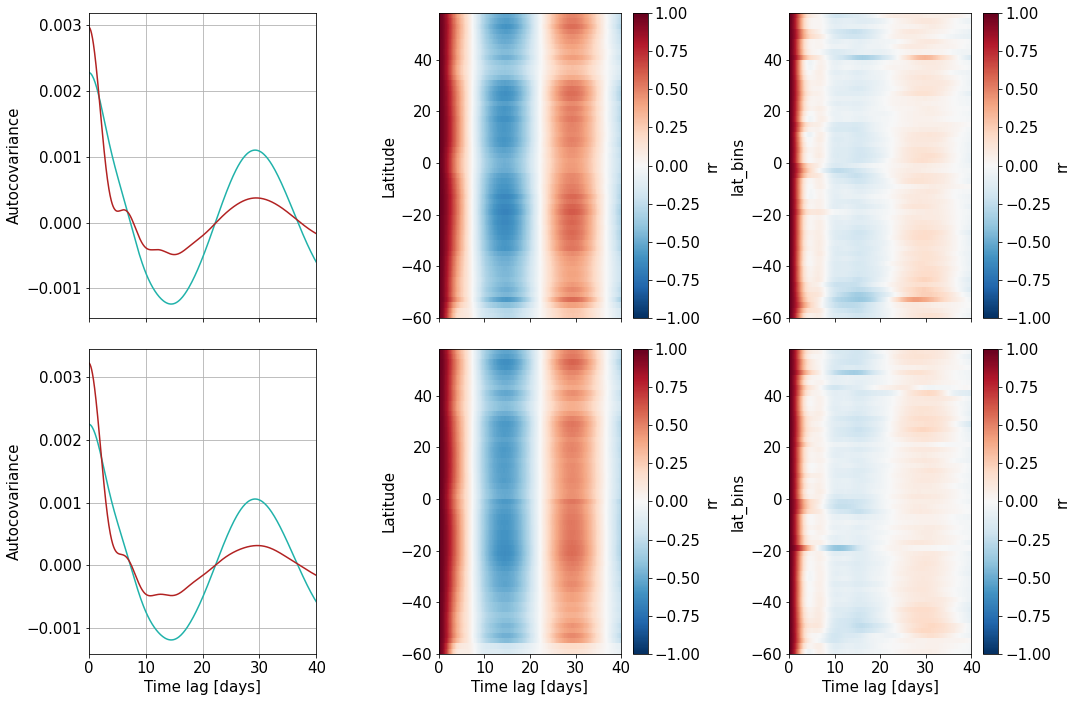

In [20]:
fig,axs = plt.subplots(2,3,figsize=(15,10),sharey=False,sharex=True)
for i,V in enumerate([[dsE,dsL], [dsEV,dsLV]]):
    V[0].rr.mean(['lon_bins','lat_bins']).plot(ax=axs[i,0],c='lightseagreen',label='Eulerian')
    V[1].rr.mean(['lon_bins','lat_bins']).plot(ax=axs[i,0],c='firebrick',label='Lagrangian')
    (V[0].rr.mean(['lon_bins'])/V[0].rr.isel(lags=0).mean(['lon_bins'])).plot(ax=axs[i,1],y='lat_bins')
    (V[1].rr.mean(['lon_bins'])/V[1].rr.isel(lags=0).mean(['lon_bins'])).plot(ax=axs[i,2],y='lat_bins')
    axs[i,0].grid();axs[i,0].set_ylabel('');axs[i,0].set_xlabel('');axs[i,1].set_xlabel('');
    axs[i,2].set_xlabel('');axs[i,1].set_ylabel('Latitude')
axs[0,0].set_ylabel('Autocovariance');axs[1,0].set_xlabel('Time lag [days]')
axs[1,0].set_ylabel('Autocovariance');axs[1,1].set_xlabel('Time lag [days]');
axs[1,2].set_xlabel('Time lag [days]')
fig.tight_layout()
#fig.savefig(fig_dir+'mean_autocov.pdf')

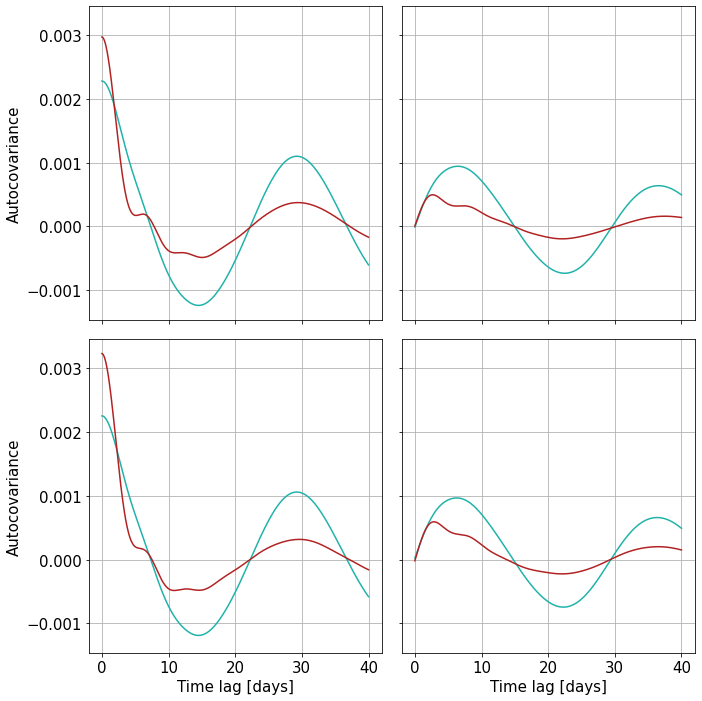

In [80]:
fig,axs = plt.subplots(2,2,figsize=(10,10),sharey=True,sharex=True)
for ax,V in zip(axs[0,:],['rr','ri']):
    dsE[V].mean(['lon_bins','lat_bins']).plot(ax=ax,c='lightseagreen',label='Eulerian')
    #(np.sign(dsE[V].mean(['lon_bins','lat_bins']))*dsE[V].std(['lon_bins','lat_bins'])
    #.plot(ax=ax,c='lightseagreen',ls='--')
    #(dsE[V].mean(['lon_bins','lat_bins'])-np.sign(dsE[V].mean(['lon_bins','lat_bins']))*dsE[V].std(['lon_bins','lat_bins'])
    #).plot(ax=ax,c='lightseagreen',ls='--')
    dsL[V].mean(['lon_bins','lat_bins']).plot(ax=ax,c='firebrick',label='Lagrangian')
    #(dsL[V].mean(['lon_bins','lat_bins'])+np.sign(dsL[V].mean(['lon_bins','lat_bins']))*dsL[V].std(['lon_bins','lat_bins'])
    #).plot(ax=ax,c='firebrick',ls='--')
    ax.grid();ax.set_ylabel('');ax.set_xlabel('')
for ax,V in zip(axs[1,:],['rr','ri']):
    dsEV[V].mean(['lon_bins','lat_bins']).plot(ax=ax,c='lightseagreen',label='Eulerian')
    dsLV[V].mean(['lon_bins','lat_bins']).plot(ax=ax,c='firebrick',label='Lagrangian')
    ax.grid();ax.set_ylabel('');ax.set_xlabel('')
axs[0,0].set_ylabel('Autocovariance');axs[1,0].set_xlabel('Time lag [days]')
axs[1,0].set_ylabel('Autocovariance');axs[1,1].set_xlabel('Time lag [days]')
fig.tight_layout()
fig.savefig(fig_dir+'mean_autocov.pdf')

### Incoherence timescale

The following timescales are estimated by fitting a theoretical gaussian model to computed and averaged autocovariance.

Model : 

$\tilde{C}(\tau) = \tilde U e^{-\tau/\tilde T}$

$\tilde U$ : Energy

$\tilde T$ : Incoherence timescale

In [56]:
#Load incoherence timescales files
dsL =  xr.open_dataset(root_dir+'L_hf_fit_gauss.nc')
dsE =  xr.open_dataset(root_dir+'E_hf_fit_gauss.nc')

### Figure 6 : Maps of incoherence timescales and their ratio

1) Eulerian timescales

2) Lagrangian timescales

3) Lagrangian voer Eulerian timescales

Following figure is additional :

4) Lagrangian - Eulerian timescales



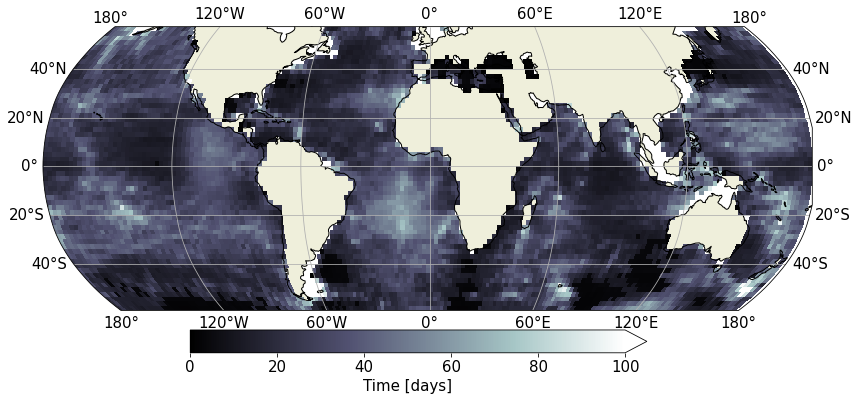

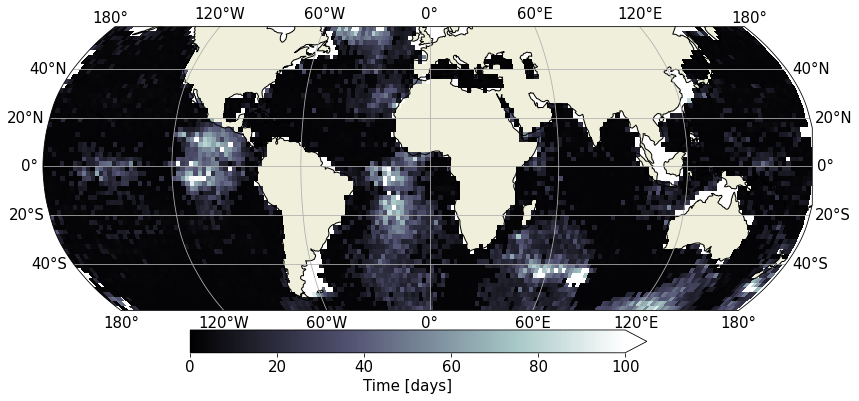

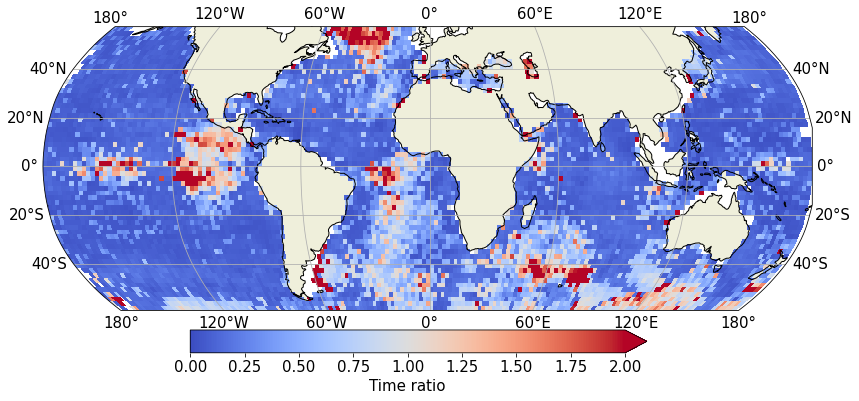

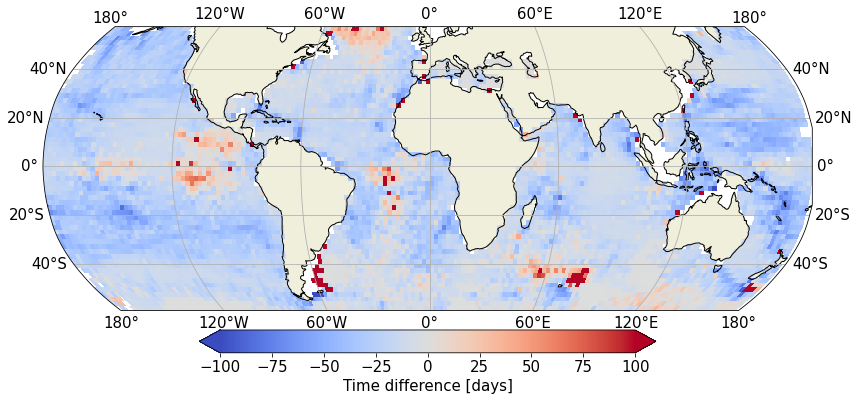

In [102]:
fig = plt.figure(figsize=(15,6))
fig,ax = plot_maps(dsE.sel(param='T').parameters_SSU,colmap='bone',vlim=(0,100),lat='lat_bins',
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':'Time [days]'})
ax.set_title('')
fig.savefig(fig_dir+'Te_fit_gauss.png')

fig = plt.figure(figsize=(15,6))
fig,ax = plot_maps(dsL.sel(param='T').parameters_SSU,colmap='bone',vlim=(0,100),lat='lat_bins',
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':'Time [days]'})
ax.set_title('')
fig.savefig(fig_dir+'Tl_fit_gauss.png')

fig = plt.figure(figsize=(15,6))
fig,ax = plot_maps((dsL/dsE).sel(param='T').parameters_SSU,colmap='coolwarm',vlim=(0,2),lat='lat_bins',
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':'Time ratio'})
ax.set_title('')
fig.savefig(fig_dir+'TlTe_fit_gauss.png')

fig = plt.figure(figsize=(15,6))
fig,ax = plot_maps((dsL-dsE).sel(param='T').parameters_SSU,colmap='coolwarm',vlim=(-100,100),lat='lat_bins',
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':'Time difference [days]'})
ax.set_title('')
fig.savefig(fig_dir+'TlTe_fit_gauss_diff.png')

#### Additional to figure 6:

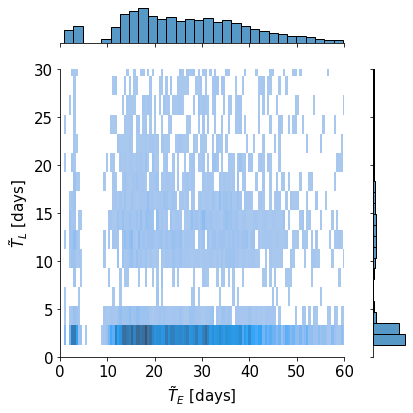

In [115]:
x = dsE.sel(param='T').parameters_SSU
y = dsL.sel(param='T').parameters_SSU
axs = sns.jointplot(x=x.values.flatten(),y=y.values.flatten(),kind='hist',xlim=(0,60),ylim=(0,30),bins=500)
axs.set_axis_labels(r'$\tilde T_E$ [days]',r'$\tilde T_L$ [days]')

fig = axs.fig
fig.tight_layout()
fig.savefig(fig_dir+'TlTe_jointpdf.png')

### Apparent incoherence timescale

We define an appparent incoherence timescale as
$\tau$ such as $k\sigma(\tau)=1$

To do so we minimize the function $k\sigma(\tau)-1$

In [41]:
#Definition of the function sigma
sigma = lambda tau, Ub, Tb: (Tb*day2sec*Ub)*np.sqrt(2*(tau/Tb - (1-np.exp(-np.abs(tau/Tb)))))

In [42]:
k = 2*np.pi/100e3 # wavenumber
dt=1/24 #time step
tau = np.arange(0,1000,dt)  #timelag
day2sec = 3600*24  #convert from days to seconds

In [43]:
#Load files
ds_low = xr.merge([xr.open_dataset(root_dir+'energy_SSU_low_binned_dl2.0.nc'),    #low frequency energy in 2° bins
                   xr.open_dataset(root_dir+'energy_SSV_low_binned_dl2.0.nc')])  

dsL_low_mean1 = xr.open_dataset(root_dir+'L_low_fit_mean1.nc')  #Lagrangian low frequency variance in 2° bins

dsL =  xr.open_dataset(root_dir+'L_hf_fit_gauss.nc')  # Lagrangian parameters from fit to a gausian model

dsE =  xr.open_dataset(root_dir+'E_hf_fit_gauss.nc')  # Eulerian parameters from fit to a gausian model



In [44]:
Tb = dsL_low_mean1.sel(param='T').parameters_SSU  # low frequency decorrelation timescale
TbV = dsL_low_mean1.sel(param='T').parameters_SSV  # low frequency decorrelation timescale
Ub = np.sqrt(ds_low.L_energy_SSU)  #low ferquency energy
Vb = np.sqrt(ds_low.L_energy_SSV)  #low ferquency energy

In [45]:
#New dataset with parameters of function sigma
ds = xr.Dataset({"tau":(["tau"],tau),                      # timelag
                 "lon":(["lon"],ds_low.lon_bin.values),    # longitude
                 "lat":(["lat"],ds_low.lat_bin.values),    # latitude
                 'Tb':(["lon","lat"],Tb.T.values),         # decorreltion timescale
                 'Ub':(["lon","lat"],Ub.values)})          # energy  

In [46]:
# k*sigma(tau)
V = (k*sigma(ds.tau,ds.Tb,ds.Ub))#.sel(lon=180,lat=30,method='nearest')

In [47]:
_V = V.fillna(-10)  #fill NaN (avoid crash with argmin function)
Vmin = np.abs(_V-2).argmin('tau')  #find tau to minimize k*sigma(tau)-1

In [48]:
Tapp = V.isel(tau=Vmin).tau   # Definition of apparent timescale

Tapp = Tapp.where(np.isnan(V.isel(tau=0))==False)  # Mask lands

Tapp = Tapp.rename({'lon':'lon_bins','lat':'lat_bins'}) # Assign (longitude;latitude) coordinates

#### Figures of apparent incoherence timescale

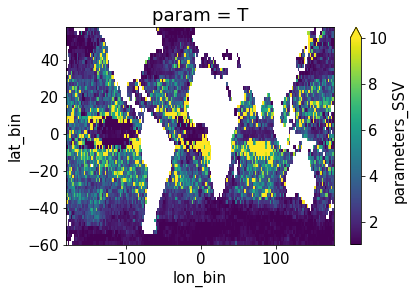

In [54]:
Tb.plot(y='lat_bin',vmax=10)

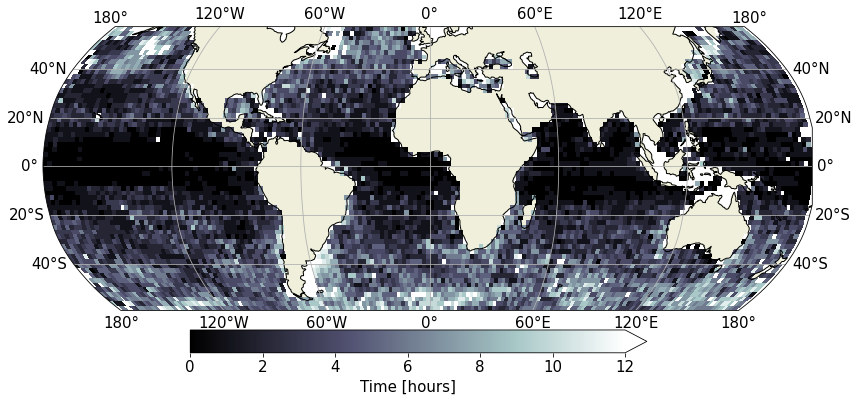

In [49]:
#Map of apparent incoherence timescale
fig = plt.figure(figsize=(15,6))
fig,ax = plot_maps(Tapp*24,colmap='bone',vlim=(0,12),lat='lat_bins',
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':'Time [hours]'})

#fig.savefig(fig_dir+'Tapparent.png')

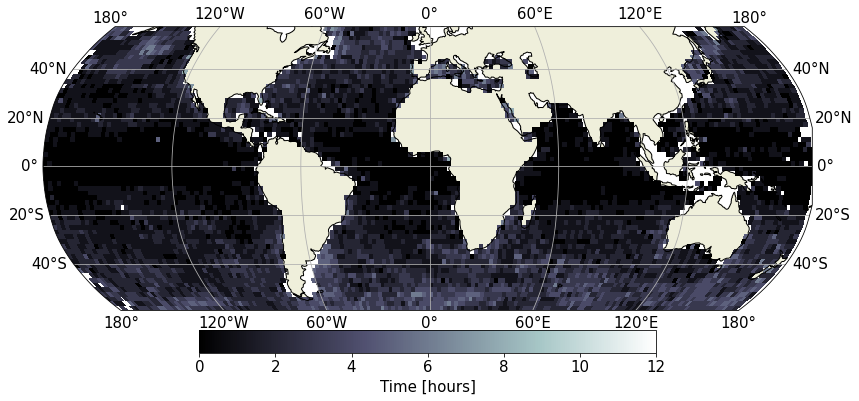

In [68]:
#Map of apparent incoherence timescale
fig = plt.figure(figsize=(15,6))
fig,ax = plot_maps(Tapp*24,colmap='bone',vlim=(0,12),lat='lat_bins',
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':'Time [hours]'})

fig.savefig(fig_dir+'Tapparent.png')

### Notes:

The timescale found is very, very short to the point that it is unrealistic. An incoherence of a few hours would mean that tides lose coherence over a time period shorter than their oscillations period.

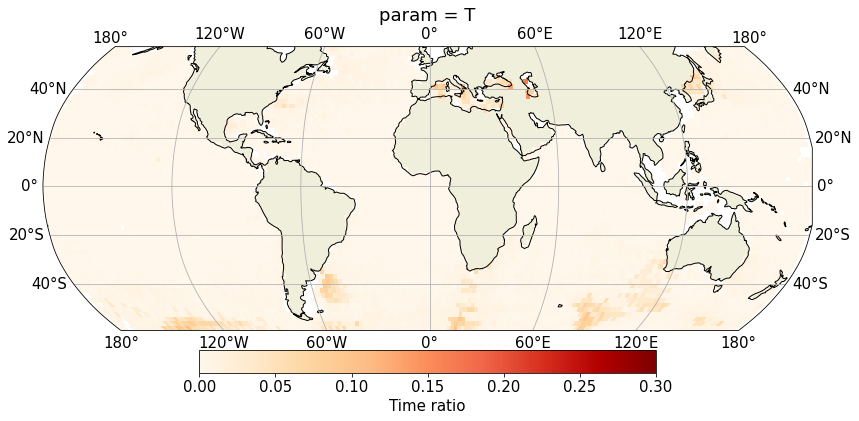

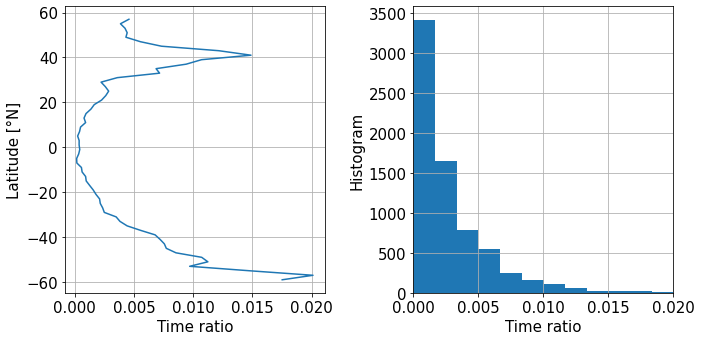

In [73]:
#Ratio of apparent timescale over Eulerian timescale
fig = plt.figure(figsize=(15,6))
fig,ax = plot_maps(Tapp/dsE.sel(param='T').parameters_SSU,colmap='OrRd',vlim=(0,0.3),lat='lat_bins',
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':'Time ratio'})

#fig.savefig(fig_dir+'TappTe.png')

#Zonal average and histogram of the ratio of apparent timescale over Eulerian timescale
fig,axs = plt.subplots(1,2,figsize=(10,5))
(Tapp/dsE.sel(param='T').parameters_SSU).mean('lon_bins').plot(ax=axs[0],y='lat_bins');
axs[0].set_ylabel('Latitude [°N]');
(Tapp/dsE.sel(param='T').parameters_SSU).plot.hist(ax=axs[1],bins=100,xlim=(0,0.02));
axs[1].set_ylabel('Histogram');
for ax in axs:
    ax.set_xlabel('Time ratio');ax.grid();ax.set_title('')
fig.tight_layout()
fig.savefig(fig_dir+'TappTe.png')

If we consider the Eulerian timescale to be the "true" one, it makes sense to compare apparent timescale to the Eulerian one. The ratio will then indicate whether the incoherence observed in the Lagrangian frame is due to drifters advection or internal tides incoherence.

To summarize the theory:

1) $\tilde T_{app}<\tilde T_E$ => Apparent incoherence dominates

2) $\tilde T_{app}>\tilde T_E$ => Internal tides incoherence dominates



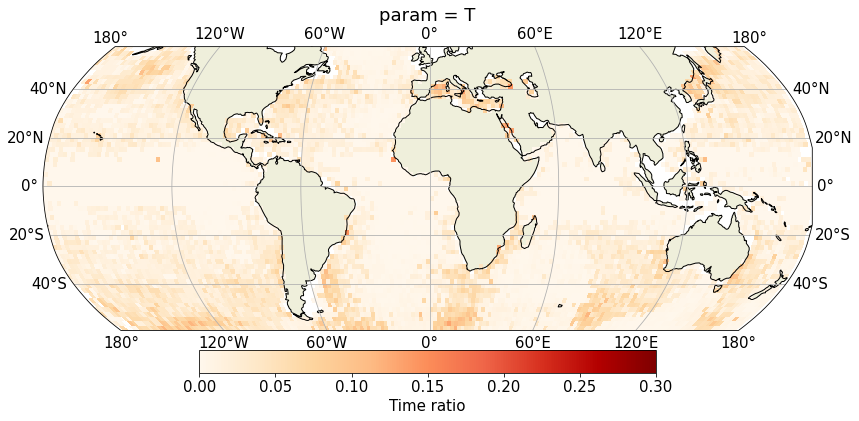

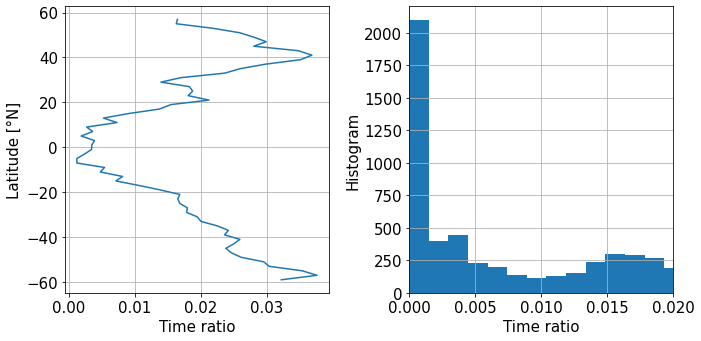

In [74]:
#Ratio of apparent timescale over Eulerian timescale
fig = plt.figure(figsize=(15,6))
fig,ax = plot_maps(Tapp/dsL.sel(param='T').parameters_SSU,colmap='OrRd',vlim=(0,0.3),lat='lat_bins',
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':'Time ratio'})

#fig.savefig(fig_dir+'TappTe.png')

#Zonal average and histogram of the ratio of apparent timescale over Eulerian timescale
fig,axs = plt.subplots(1,2,figsize=(10,5))
(Tapp/dsL.sel(param='T').parameters_SSU).mean('lon_bins').plot(ax=axs[0],y='lat_bins');
axs[0].set_ylabel('Latitude [°N]');
(Tapp/dsL.sel(param='T').parameters_SSU).plot.hist(ax=axs[1],bins=100,xlim=(0,0.02));
axs[1].set_ylabel('Histogram');
for ax in axs:
    ax.set_xlabel('Time ratio');ax.grid();ax.set_title('')
fig.tight_layout()
fig.savefig(fig_dir+'TappTl.png')

#### Effective timescale

Here the goal is to provide a theoretcial estimation of the Lagrangian timescale.

To do so, we want to find:

$\tau \vert \tilde C_E(\tau)e^{-k^2\sigma^2(\tau)/2} = \tilde V_L /2 $

To do so we find $\tau$ minimizing $\tilde C_E(\tau)e^{-k^2\sigma^2(\tau)/2} - \tilde V_L /2$

In [75]:
# Theoretical Lagrangian autocovariance function
Cl = lambda tau,Vt,Tt,Ub,Tb,k: Vt*np.exp(-(tau/Tt)**2)*np.exp(-(k*sigma(tau,Ub,Tb))**2/2)

# Theoretical Eulerian autocovariance function
Ce = lambda tau,Vt,Tt,Ub,Tb,k: Vt*np.exp(-(tau/Tt)**2)*np.exp((k*sigma(tau,Ub,Tb))**2/2)

In [40]:
np.log(2)

0.6931471805599453

In [94]:
Tt = dsE.sel(param='T').parameters_SSU  #Eulerian incoherence timescale
Vt = dsE.sel(param='U').parameters_SSU  #Eulerian energy
#Vt = ds_hf_dl2.E_energy_SSU  #Eulerian energy
Tt_L = dsL.sel(param='T').parameters_SSU  #Lagrangian incoherence timescale
Vt_L = dsL.sel(param='U').parameters_SSU   #Lagrangian incoherence timescale
#Vt_L = ds_hf_dl2.L_energy_SSU

#Dataset with parameters for Cl
ds_Teff = xr.Dataset({"tau":(["tau"],tau),                                 # Timelag
                      "lon":(["lon"],ds_low.lon_bin.values),               # longitude
                      "lat":(["lat"],ds_low.lat_bin.values),               # latitude
                      'Tt':(["lon","lat"],Tt.values),                      # Eulerian timescale
                      'Vt':(["lon","lat"],Vt.values),                      # Eulerian energy
                      'TtL':(["lon","lat"],Tt_L.values.T),                      # Lagrangian timescale
                      'VtL':(["lon","lat"],Vt_L.values.T),                 # Lagrangian energy
                      'Tb':(["lon","lat"],Tb.T.values),                    # Low frequency timescale
                      'Ub':(["lon","lat"],Ub.values),                      # Low frequency energy
                      'k':(['lon','lat'],np.full_like(Vt,2*np.pi/100000))  # Wavenumber
                     })

In [100]:
Tt = dsE.sel(param='T').parameters_SSV  #Eulerian incoherence timescale
Vt = dsE.sel(param='U').parameters_SSV  #Eulerian energy
#Vt = ds_hf_dl2.E_energy_SSU  #Eulerian energy
Tt_L = dsL.sel(param='T').parameters_SSV  #Lagrangian incoherence timescale
Vt_L = dsL.sel(param='U').parameters_SSV   #Lagrangian incoherence timescale
#Vt_L = ds_hf_dl2.L_energy_SSU

#Dataset with parameters for Cl
dsV_Teff = xr.Dataset({"tau":(["tau"],tau),                                 # Timelag
                      "lon":(["lon"],ds_low.lon_bin.values),               # longitude
                      "lat":(["lat"],ds_low.lat_bin.values),               # latitude
                      'Tt':(["lon","lat"],Tt.values),                      # Eulerian timescale
                      'Vt':(["lon","lat"],Vt.values),                      # Eulerian energy
                      'TtL':(["lon","lat"],Tt_L.values.T),                      # Lagrangian timescale
                      'VtL':(["lon","lat"],Vt_L.values.T),                 # Lagrangian energy
                      'Tb':(["lon","lat"],Tb.T.values),                    # Low frequency timescale
                      'Ub':(["lon","lat"],Vb.values),                      # Low frequency energy
                      'k':(['lon','lat'],np.full_like(Vt,2*np.pi/100000))  # Wavenumber
                     })

In [101]:
# Lagrangian theoretical autocovariance with estimated parameters
#CL = Cl(ds_Teff.tau,ds_Teff.Vt,ds_Teff.Tt,ds_Teff.Ub,ds_Teff.Tb,ds_Teff.k)
CLV = Cl(dsV_Teff.tau,dsV_Teff.Vt,dsV_Teff.Tt,dsV_Teff.Ub,dsV_Teff.Tb,ds_Teff.k)

In [79]:
# Lagrangian theoretical autocovariance with estimated parameters
CE = Ce(ds_Teff.tau,ds_Teff.VtL,ds_Teff.TtL,ds_Teff.Ub,ds_Teff.Tb,ds_Teff.k)

/opt/anaconda3/envs/croco/lib/python3.8/site-packages/xarray/core/computation.py:727: RuntimeWarning: overflow encountered in exp
  result_data = func(*input_data)


In [96]:
Teff = CL.isel(tau=np.abs(CL-ds_Teff.VtL/2).fillna(-1).argmin(axis=-1)).tau # definition of effective timescale
Teff = Teff.rename({'lon':'lon_bins','lat':'lat_bins'})  # assign coordinates

In [ ]:
TVeff = CLV.isel(tau=np.abs(CLV-dsV_Teff.VtL/2).fillna(-1).argmin(axis=-1)).tau # definition of effective timescale
TVeff = TVeff.rename({'lon':'lon_bins','lat':'lat_bins'})  # assign coordinates

In [81]:
TE_eff = CE.isel(tau=np.abs(CE-ds_Teff.Vt/2).fillna(-1).argmin(axis=-1)).tau # definition of effective timescale
TE_eff = TE_eff.rename({'lon':'lon_bins','lat':'lat_bins'})  # assign coordinates

#### Figure effective Lagrangian timescale

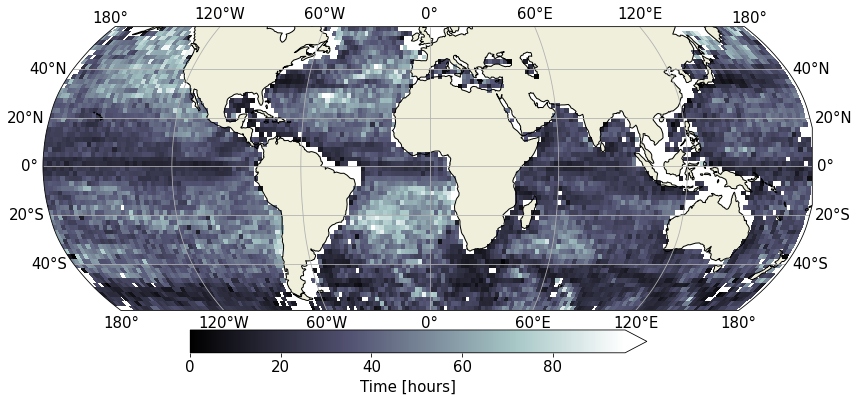

In [97]:
# Map of effective Lagrangian timescale
fig = plt.figure(figsize=(15,6))
fig,ax = plot_maps(Teff.where(Teff>0)*24,colmap='bone',vlim=(0,4*24),lat='lat_bins',
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':'Time [hours]'})
#fig.savefig(fig_dir+'Teffective.png')

### Notes:

The result for the effective timescale are more realistic.
They remain short, lower than 4 days but could indeed represent Lagrangian timescales.

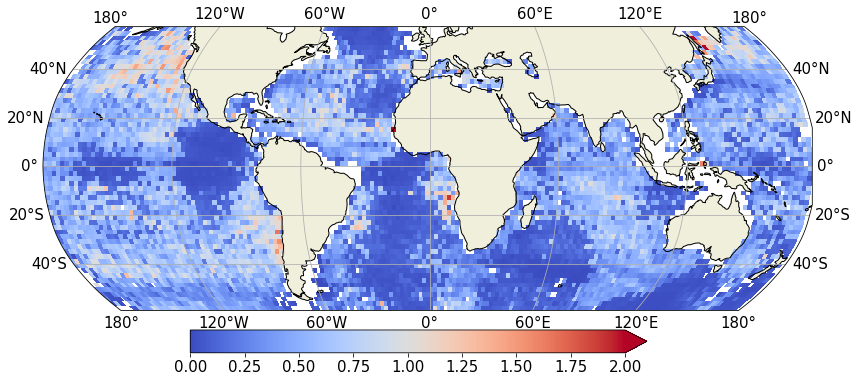

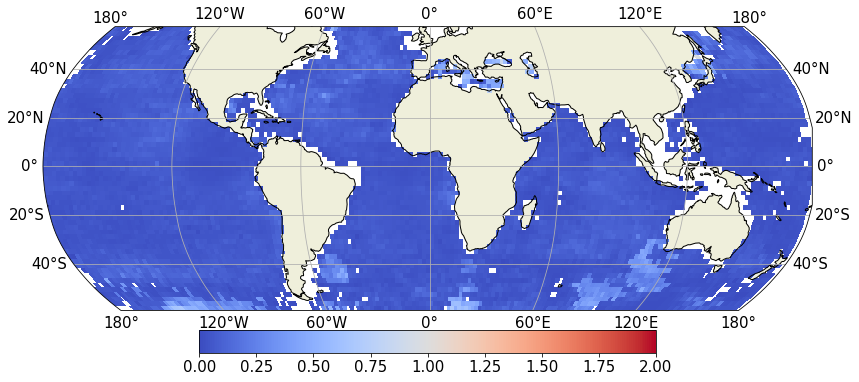

In [106]:
# Ratio of effective timescale over Lagrangian timescale
fig = plt.figure(figsize=(15,6))
fig,ax = plot_maps(Teff.where(Teff>0)/dsL.sel(param='T').parameters_SSU,colmap='coolwarm',vlim=(0,2),lat='lat_bins',
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':''})
ax.set_title('')
fig.savefig(fig_dir+'TeffTl.png')

# Ratio of effective timescale over Eulerian timescale
fig = plt.figure(figsize=(15,6))
fig,ax = plot_maps(Teff.where(Teff>0)/dsE.sel(param='T').parameters_SSU,colmap='coolwarm',vlim=(0,2),lat='lat_bins',
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':''})
ax.set_title('')
fig.savefig(fig_dir+'TeffTe.png')

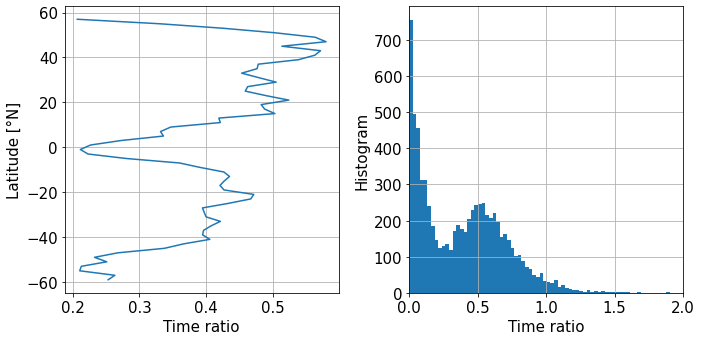

In [110]:
# Zonal average and histogram of the ratio of effective timescale over Lagrangian timescale
fig,axs = plt.subplots(1,2,figsize=(10,5))
(Teff/dsL.sel(param='T').parameters_SSU).mean('lon_bins').plot(ax=axs[0],y='lat_bins');
axs[0].set_ylabel('Latitude [°N]');
(Teff/dsL.sel(param='T').parameters_SSU).plot.hist(ax=axs[1],bins=100,xlim=(0,2));
axs[1].set_ylabel('Histogram');
for ax in axs:
    ax.set_xlabel('Time ratio');ax.grid();ax.set_title('')
fig.tight_layout()
fig.savefig(fig_dir+'TeffTl_hist.png')

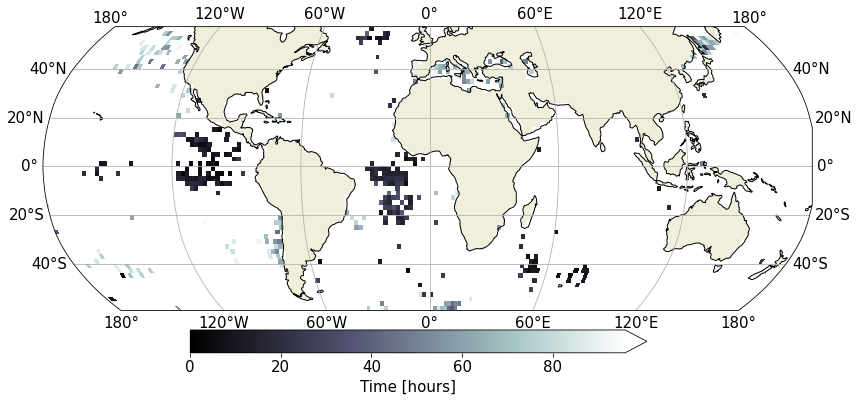

In [82]:
# Map of effective Lagrangian timescale
fig = plt.figure(figsize=(15,6))
fig,ax = plot_maps(TE_eff.where(TE_eff>0)*24,colmap='bone',vlim=(0,4*24),lat='lat_bins',
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':'Time [hours]'})

### Predicting Eulerian energy levels (not working)

In [21]:
from dask.distributed import Client, LocalCluster
cluster = LocalCluster()
#from dask_jobqueue import PBSCluster
#cluster = PBSCluster(processes=5, cores=5,walltime='02:00:00') #processes=7, cores=7
#w = cluster.scale(jobs=2)
#client = Client()  # set up local cluster on your laptop
client = Client(cluster) # with distributed cluster
client

<Client: 'tcp://127.0.0.1:52699' processes=4 threads=4, memory=8.00 GiB>

In [29]:
# wave
k = 2*np.pi/200e3 # rad/m
# filter
bandwidth = 0.4 # cpd
dt = 3/24 # time step in days
rad = 2*np.pi


In [30]:
#Low frequnecy motion
#Eulerian
dsE_low_mean0 = xr.open_dataset(root_dir+'E_low_fit_mean0_v2.nc')
#dsE_low_mean1 = xr.open_dataset(root_path+'E_low_fit_mean1.nc')

#Lagrangian
dsL_low_mean0 = xr.open_dataset(root_dir+'L_low_fit_mean0_v2.nc')
dsL_low_mean1 = xr.open_dataset(root_dir+'L_low_fit_mean1.nc')


#Internal tides estimated parameters (via fit)
#Eulerian
dsE = xr.open_dataset(root_dir+'E_hf_fit_gauss.nc') 
#Lagrangian
dsL = xr.open_dataset(root_dir+'L_hf_fit_gauss.nc')

#Eulerian and Lagrangian energy
hf_dl2 = xr.merge([xr.open_dataset(root_dir+'energy_SSU_hf_binned_dl2.0.nc'),
                   xr.open_dataset(root_dir+'energy_SSV_hf_binned_dl2.0.nc')
                  ]).rename({'lon_bin':'lon_bins','lat_bin':'lat_bins'})


In [31]:
def get_tidal_frequencies(*args, units="cpd"):
    """
    """
    from pytide import WaveTable
    td = WaveTable()
    if units=="cpd":
        scale=86400/2/np.pi
    elif units=="cph":
        scale=3600/2/np.pi
    else:
        # cps
        scale=1/2/np.pi
    return {c: td.wave(c).freq * scale for c in args}

tidal_omega = get_tidal_frequencies("M2", "K2","S2","N2")
omega_M2,omega_S2,omega_N2,omega_K2, domega, name = tidal_omega["M2"],tidal_omega["S2"],tidal_omega["N2"],tidal_omega["K2"], .2, "semidiurnal"
omega = (omega_M2+omega_S2)/2

omega_sn = (omega_S2-omega_M2)/2
tau = np.arange(0,dsL.lags.max()+dt,dt) #time lag
print('Spring-neap cycle : ', 1/(2*omega_sn), 'days')
print('Oscillation after demodulation ( spring-neap cycle /2): ', 1/omega_sn, 'days')

Spring-neap cycle :  14.765294045749723 days
Oscillation after demodulation ( spring-neap cycle /2):  29.530588091499446 days


In [32]:
# Timescales
Tlbar = dsL_low_mean1.sel(param='T').parameters_SSU.values     # Lagrangian low frequency decorrelation timescale
Te = dsE.sel(param='T').parameters_SSU.values                  # Eulerian incoherence timescale
Tl = dsL.sel(param='T').parameters_SSU.values                  # Lagrangian incoherence timescale

TlbarV = dsL_low_mean1.sel(param='T').parameters_SSV.values    # Lagrangian low frequency decorrelation timescale
TeV = dsE.sel(param='T').parameters_SSV.values                 # Eulerian incoherence timescale
TlV = dsL.sel(param='T').parameters_SSV.values                 # Lagrangian incoherence timescale

# Energy
Ulbar = ds_low.L_energy_SSU.values                             # Lagrangian low frequency energy (SSU)
Vlbar = ds_low.L_energy_SSV.values                             # Lagrangian low frequency energy (SSV)

#U = dsE.rr.isel(lags=0).values
Ue = hf_dl2.E_energy_SSU.values                                # Eulerian semidiurnal energy  (SSU)
Ul = hf_dl2.L_energy_SSU.values                                # Lagrangian semidiurnal energy  (SSU)
Ve = hf_dl2.E_energy_SSV.values                                # Eulerian semidiurnal energy  (SSV)
Vl = hf_dl2.L_energy_SSV.values                                # Lagrangian semidiurnal energy  (SSV)
#dsE_out.sel(param='V').parameters.values
#Ul = dsL_out.sel(param='V').parameters.values

In [33]:
#New datasets with all necessary parameters

#SSU
ds = xr.Dataset(dict(T=(["lon",'lat'],Tl.T), k=k, Ubar=(["lon",'lat'], np.sqrt(Ulbar)),
                     Tbar=(["lon",'lat'], Tlbar.T), U=(["lon",'lat'], Ul)))

#SSV
dsV = xr.Dataset(dict(T=(["lon",'lat'],TlV.T), k=k, Ubar=(["lon",'lat'], np.sqrt(Vlbar)),
                     Tbar=(["lon",'lat'], TlbarV.T), U=(["lon",'lat'], Vl)))
#ds = xr.Dataset(dict(T=(["lon",'lat'],Te), k=k, Ubar=(["lon",'lat'], np.sqrt(Ulbar)),
#                     Tbar=(["lon",'lat'], Tlbar.T), U=(["lon",'lat'], Ue)))
#ds = ds.chunk({"lon":10,'lat':10})

In [34]:
for name in ds.variables.keys():
    ds[name] = ds[name].astype('float128')

Text(0.5, 1.0, '(k$\\bar V\\bar T)^2$')

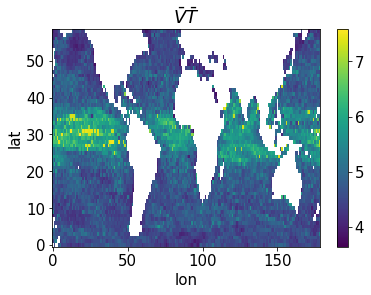

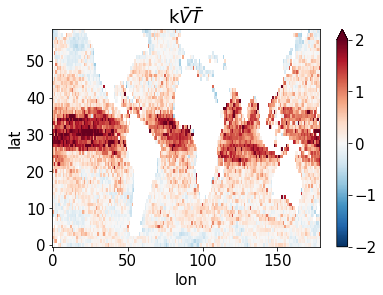

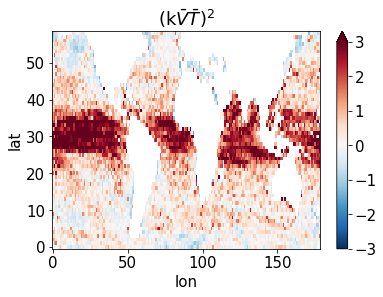

In [19]:
np.log10(ds.Ubar*ds.Tbar*3600*24).plot(y='lat')
plt.title(r'$\bar V\bar T$')
plt.figure()
np.log10(ds.k*ds.Ubar*ds.Tbar*3600*24).plot(y='lat',vmax=2)
plt.title(r'k$\bar V\bar T$')

plt.figure()
np.log10((ds.k*ds.Ubar*ds.Tbar*3600*24)**2).plot(y='lat',vmax=3)
plt.title(r'(k$\bar V\bar T)^2$')

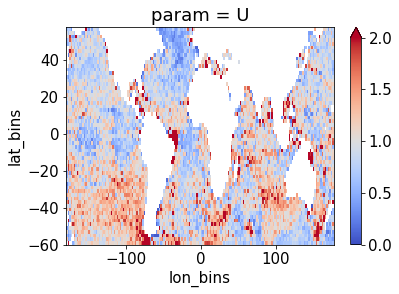

In [66]:
(2*dsL.sel(param='U').parameters_SSU/ds_hf_dl2.L_energy_SSU.rename({'lon_bin':'lon_bins','lat_bin':'lat_bins'})
).plot(y='lat_bins',vmax=2,vmin=0,cmap='coolwarm')

In [35]:
def get_eulerian_energy(ds,model='gauss',axis=-1,_factor_tau_max=10,_factor_dtau=100):
    day2sec = 86400
    #    U = 1
    omega0 = (omega_M2+omega_S2)/2
    omega_sn = (omega_S2-omega_M2)
        # check all variables are here
    input_variables = ["T", "k", "Ubar", "Tbar"]
    assert all([v in ds for v in input_variables]), \
        "one of T, k, Ubar, Tbar is missing from ds"
    #ds = ds.isel(lon=slice(0,None,4),lat=slice(0,None,4))
    ds = ds.set_coords(input_variables)

    # default autocorrelation
    if model=='gauss':
        Cl = lambda tau, U, T: U * np.exp(-np.abs(tau/T)**2) * (np.cos(2*np.pi*tau*omega0))
    elif model=='exp':
        Cl = lambda tau, U, T: U * np.exp(-np.abs(tau/T)) * (np.cos(2*np.pi*omega0*tau))
    else:
        print('Unknown model')
        # derives Lagrangian
    #    sigma = lambda tau, Ub, Tb: Tb*day2sec*Ub*np.sqrt(2*(tau/Tb - (1-np.exp(-np.abs(tau/Tb)))))
    sigma = lambda tau, Ub, Tb: (Tb*day2sec*Ub)*np.sqrt(2*(tau/Tb - (1-np.exp(-np.abs(tau/Tb)))))
    Ce = lambda tau, U, T, k, Ub, Tb: Cl(tau, U, T) * np.exp( (sigma(tau, Ub, Tb)*k)**2 /2)

        # build lags
    tau_max = np.nanmean(Tl)*_factor_tau_max
    dtau = 2*np.pi/omega0/_factor_dtau
    ds = ds.assign_coords(tau=("tau", np.arange(0, tau_max, dtau)))

    ds["Cl"] = Cl(ds.tau, ds.U, ds["T"])
    ds["Ce"] = Ce(ds.tau, ds.U, ds["T"], ds.k, ds.Ubar, ds.Tbar)
    ds["sigma"] = sigma(ds.tau,ds.Ubar,ds.Tbar)
    N = ds.tau.size
    if axis==-1:
        input_dims_Ce, input_dims_Cl = ["tau"],["tau"]
        output_dims_Ce, output_dims_Cl = ["omega"], ["omega"]
    elif axis==0:
        dim = 'k'
        input_dims_Cl = ["tau"]#[d for d in ds.Ce.dims]
        output_dims_Cl = ["omega"]#+[d for d in ds.Ce.dims[1:]]

        input_dims_Ce = ["tau","k"]#[d for d in ds.Cl.dims]
        output_dims_Ce = ["omega","k"]#+[d for d in ds.Cl.dims[1:]]
    print(input_dims_Cl,output_dims_Cl)
    def dct(C,input_dims,output_dims):
        return xr.apply_ufunc(lambda C: fft.dct(C, type=3,axis=axis) * dtau,
                                  C,
                                  dask="parallelized",
                                  input_core_dims=[input_dims],
                                  output_core_dims=[output_dims],
                                  dask_gufunc_kwargs=dict(output_sizes=dict(omega=N)), #[[N]]
                                 )
    ds["Ee"] = dct(ds.Ce.where(ds.Ce<np.inf).fillna(-1),input_dims_Ce,output_dims_Ce)
    ds["El"] = dct(ds.Cl,input_dims_Cl,output_dims_Cl)
    ds["omega"] = (2*np.arange(N)+1)/4/N /dtau
    
    # integrate within filter band
    Ee = (ds.Ee
          .where( np.abs(ds.omega-omega0)<bandwidth/2, other=0 )
          .integrate("omega")
             )
    El = (ds.El
              .where( np.abs(ds.omega-omega0)<bandwidth/2, other=0 )
              .integrate("omega")
             )
    Ee = Ee.assign_coords({'lat':dsE.lat_bins.values,'lon':dsE.lon_bins.values})
    El = El.assign_coords({'lat':dsE.lat_bins.values,'lon':dsE.lon_bins.values})

    Ee = Ee.rename({'lat':'lat_bins','lon':'lon_bins'})
    El = El.rename({'lat':'lat_bins','lon':'lon_bins'})
    ds["ratio"] = El/Ee
    return Ee,El,ds

In [36]:
Ee,El,out = get_eulerian_energy(ds,model='gauss',_factor_tau_max=10)

/opt/anaconda3/envs/croco/lib/python3.8/site-packages/xarray/core/computation.py:727: RuntimeWarning: overflow encountered in exp
  result_data = func(*input_data)


['tau'] ['omega']


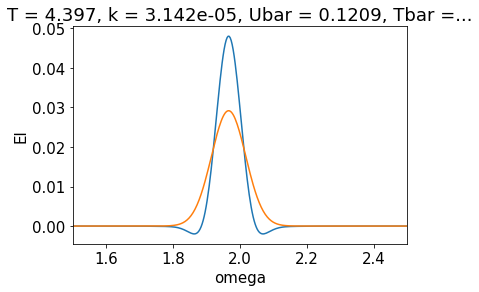

In [22]:
out.Ee.isel(lon=0,lat=10).plot(xlim=(1.5,2.5))
out.El.isel(lon=0,lat=10).plot(xlim=(1.5,2.5))
#plt.yscale('log')

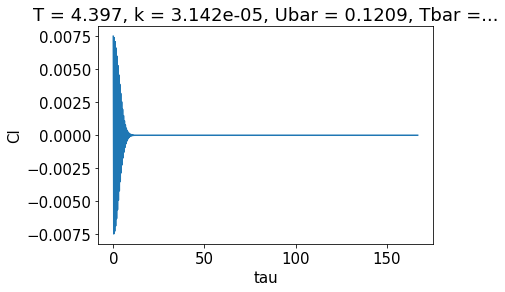

In [23]:
out.Cl.isel(lon=0,lat=10).plot()

Text(0.5, 1.0, 'Observed Lagrangian')

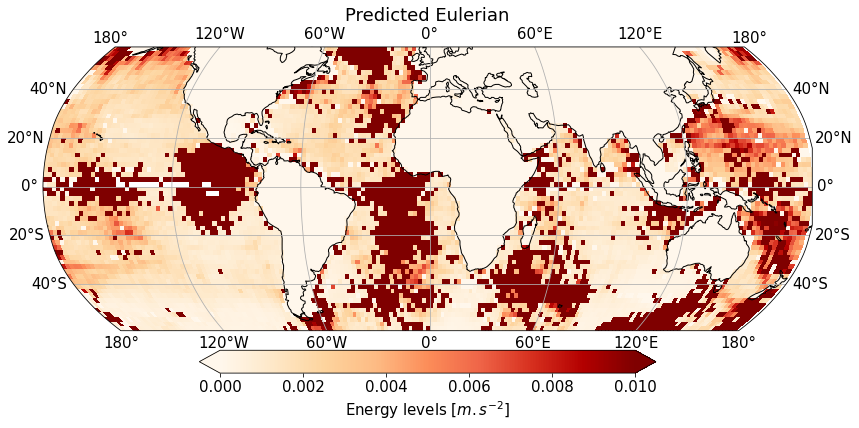

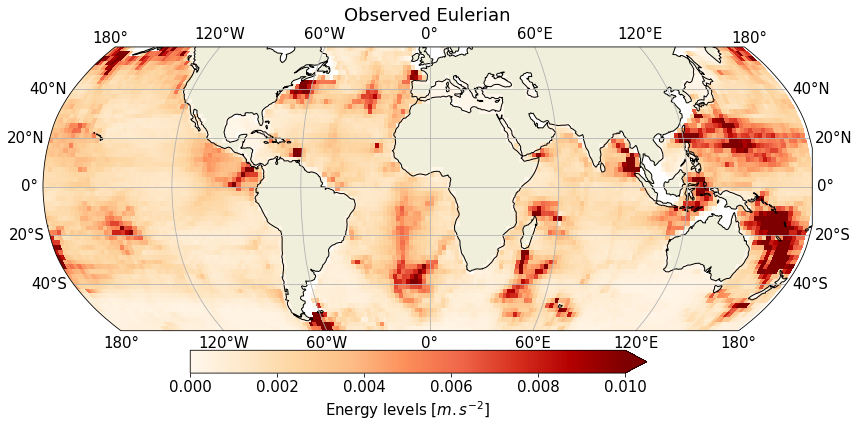

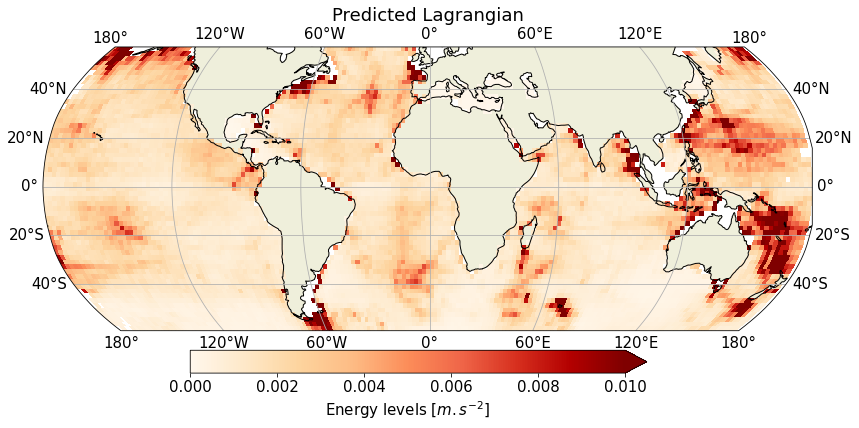

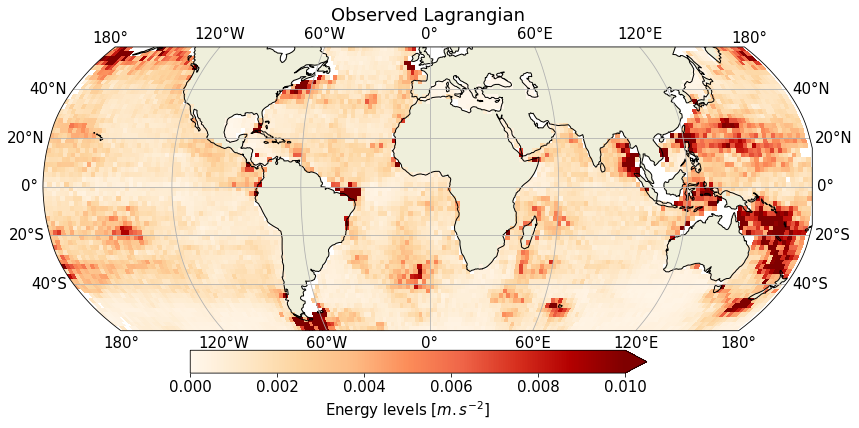

In [28]:
fig = plt.figure(figsize=(15,6))
fig,ax = plot_maps(Ee,colmap='OrRd',vlim=(0,0.01),lat='lat_bins',
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':r'Energy levels [$m.s^{-2}$]'})
ax.set_title('Predicted Eulerian')
#fig.savefig(fig_dir+'EKE_predicted.png')

fig = plt.figure(figsize=(15,6))
fig,ax = plot_maps(dsE.sel(param='U').parameters_SSU,colmap='OrRd',vlim=(0,0.01),lat='lat_bins',
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':r'Energy levels [$m.s^{-2}$]'})
ax.set_title('Observed Eulerian')
#fig.savefig(fig_dir+'EKE_predicted.png')

fig = plt.figure(figsize=(15,6))
fig,ax = plot_maps(El,colmap='OrRd',vlim=(0,0.01),lat='lat_bins',
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':r'Energy levels [$m.s^{-2}$]'})
ax.set_title('Predicted Lagrangian')
#fig.savefig(fig_dir+'EKE_predicted.png')

fig = plt.figure(figsize=(15,6))
fig,ax = plot_maps(dsL.sel(param='U').parameters_SSU,colmap='OrRd',vlim=(0,0.01),lat='lat_bins',
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':r'Energy levels [$m.s^{-2}$]'})
ax.set_title('Observed Lagrangian')
#fig.savefig(fig_dir+'EKE_predicted.png')

Text(0.5, 1.0, 'Lagrangian')

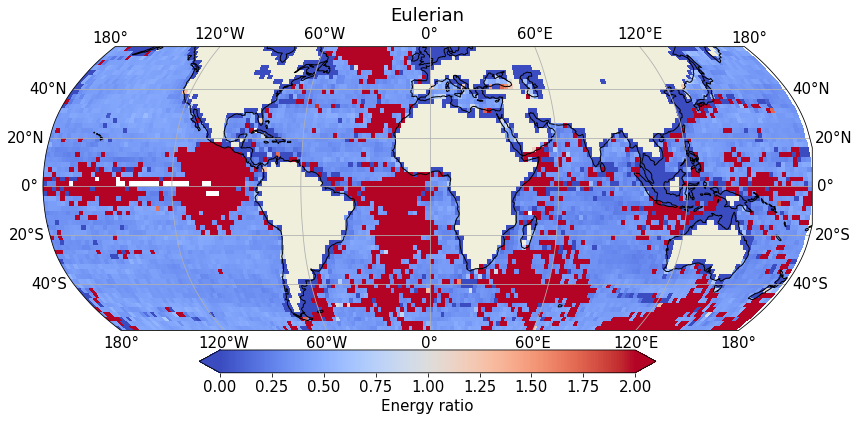

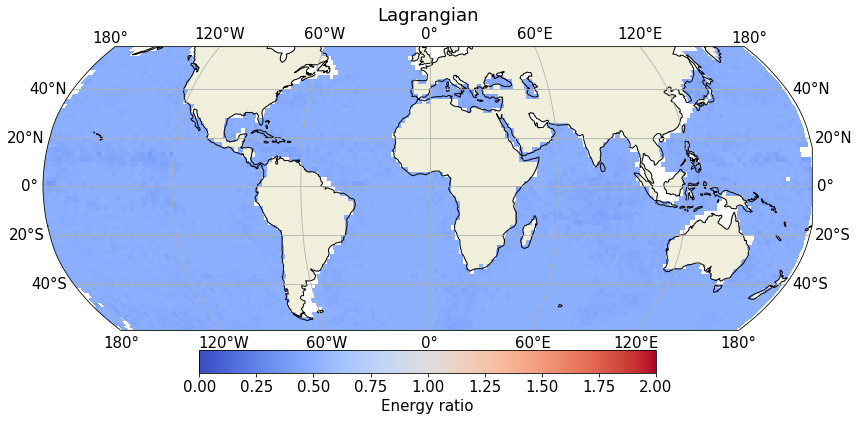

In [37]:
fig = plt.figure(figsize=(15,6))
fig,ax = plot_maps(Ee/Ue,colmap='coolwarm',vlim=(0,2),lat='lat_bins',
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':r'Energy ratio'})
ax.set_title('Eulerian')
#fig.savefig(fig_dir+'EKE_predicted.png')

fig = plt.figure(figsize=(15,6))
fig,ax = plot_maps(El/Ul,colmap='coolwarm',vlim=(0,2),lat='lat_bins',
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':r'Energy ratio'})
ax.set_title('Lagrangian')

Text(0.5, 1.0, 'Lagrangian')

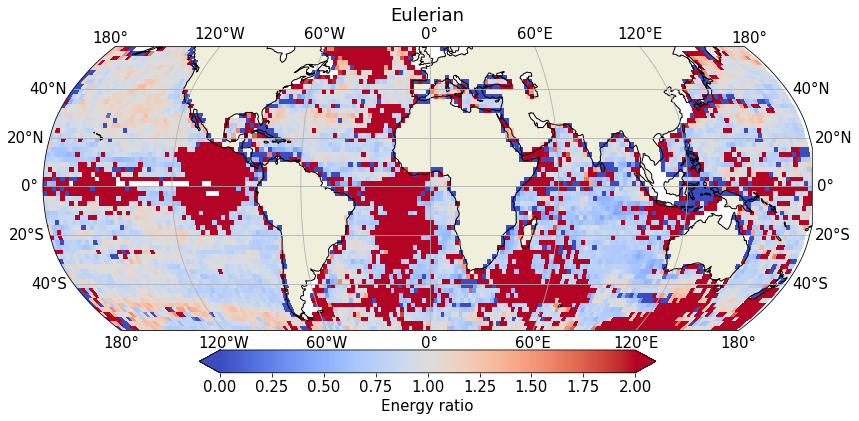

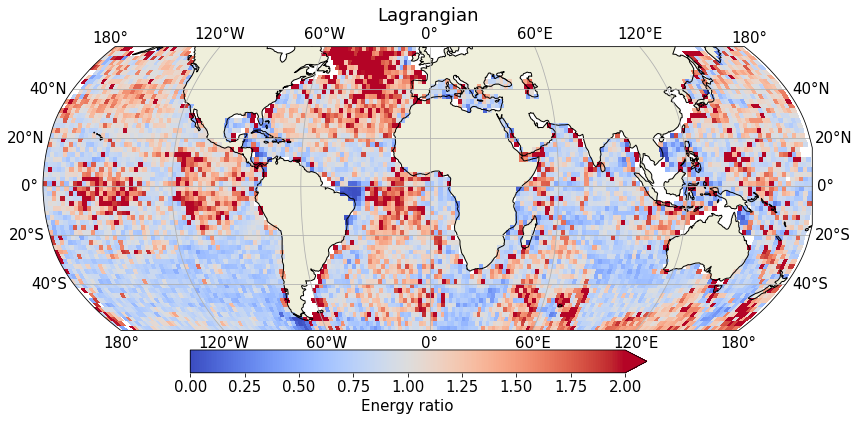

In [29]:
fig = plt.figure(figsize=(15,6))
fig,ax = plot_maps(Ee/Ue,colmap='coolwarm',vlim=(0,2),lat='lat_bins',
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':r'Energy ratio'})
ax.set_title('Eulerian')
#fig.savefig(fig_dir+'EKE_predicted.png')

fig = plt.figure(figsize=(15,6))
fig,ax = plot_maps(El/Ul,colmap='coolwarm',vlim=(0,2),lat='lat_bins',
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':r'Energy ratio'})
ax.set_title('Lagrangian')
#fig.savefig(fig_dir+'EKE_predicted.png')

In [38]:
EeV,ElV,outV = get_eulerian_energy(dsV)

/opt/anaconda3/envs/croco/lib/python3.8/site-packages/xarray/core/computation.py:727: RuntimeWarning: overflow encountered in exp
  result_data = func(*input_data)


['tau'] ['omega']


Text(0.5, 1.0, 'Observed Lagrangian')

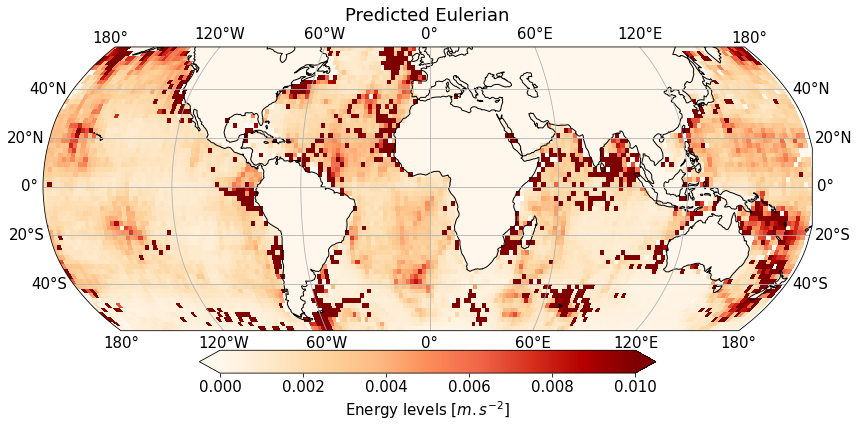

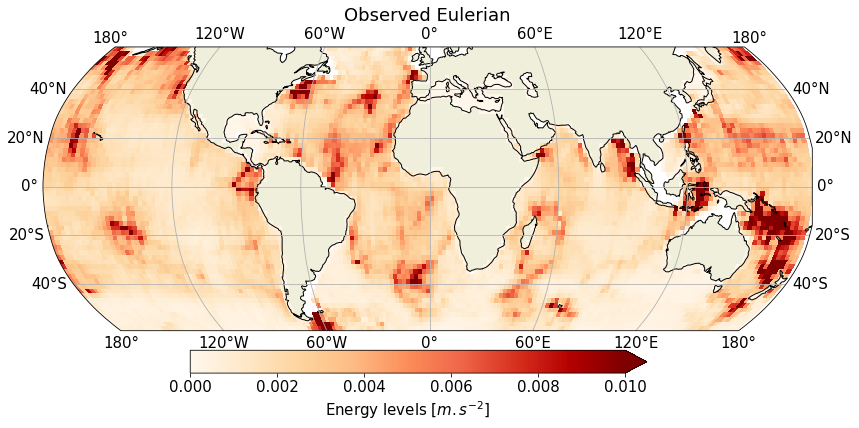

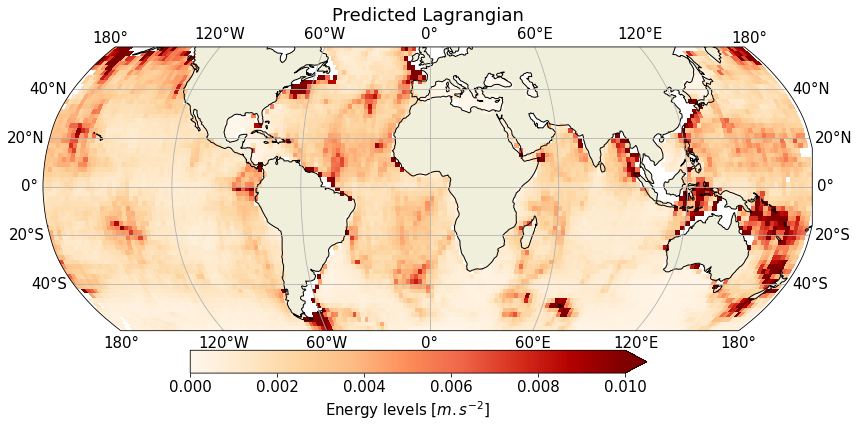

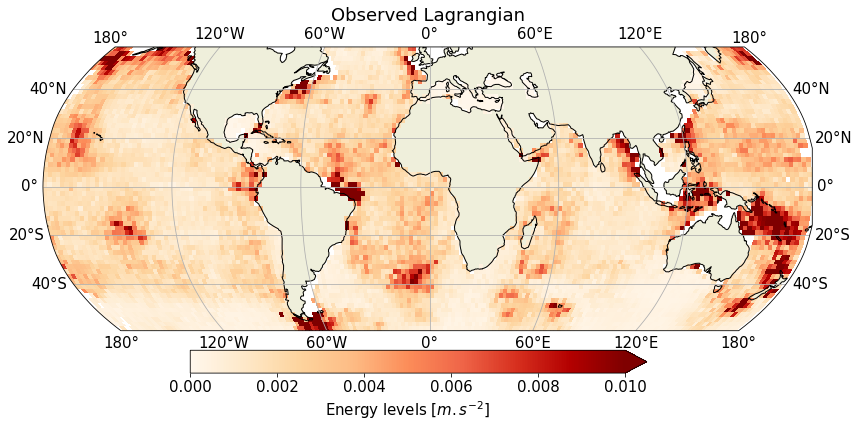

In [31]:
fig = plt.figure(figsize=(15,6))
fig,ax = plot_maps(EeV,colmap='OrRd',vlim=(0,0.01),lat='lat_bins',
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':r'Energy levels [$m.s^{-2}$]'})
ax.set_title('Predicted Eulerian')
#fig.savefig(fig_dir+'EKE_predicted.png')

fig = plt.figure(figsize=(15,6))
fig,ax = plot_maps(dsE.sel(param='U').parameters_SSV,colmap='OrRd',vlim=(0,0.01),lat='lat_bins',
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':r'Energy levels [$m.s^{-2}$]'})
ax.set_title('Observed Eulerian')
#fig.savefig(fig_dir+'EKE_predicted.png')

fig = plt.figure(figsize=(15,6))
fig,ax = plot_maps(ElV,colmap='OrRd',vlim=(0,0.01),lat='lat_bins',
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':r'Energy levels [$m.s^{-2}$]'})
ax.set_title('Predicted Lagrangian')
#fig.savefig(fig_dir+'EKE_predicted.png')

fig = plt.figure(figsize=(15,6))
fig,ax = plot_maps(dsL.sel(param='U').parameters_SSV,colmap='OrRd',vlim=(0,0.01),lat='lat_bins',
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':r'Energy levels [$m.s^{-2}$]'})
ax.set_title('Observed Lagrangian')
#fig.savefig(fig_dir+'EKE_predicted.png')




Text(0.5, 1.0, 'Lagrangian')

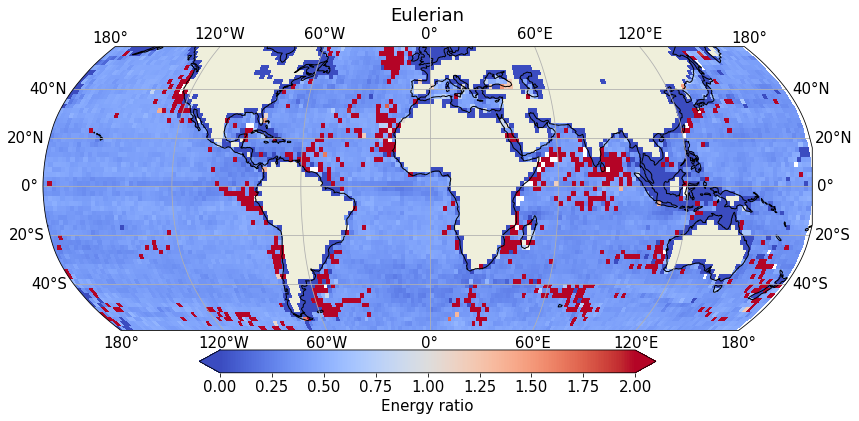

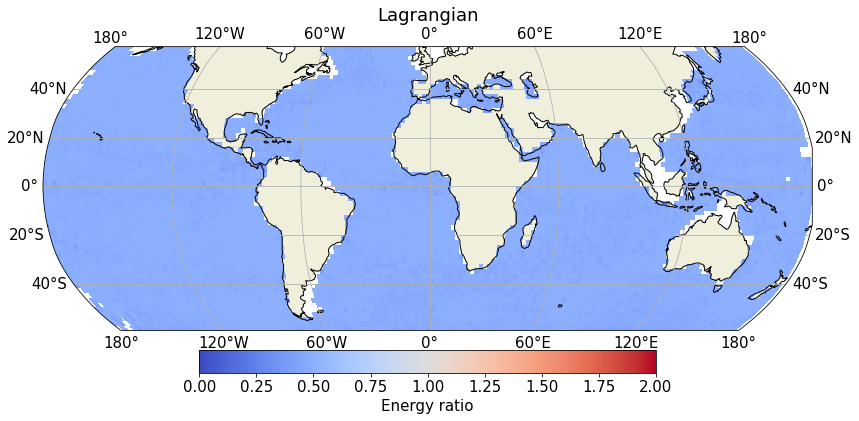

In [39]:
fig = plt.figure(figsize=(15,6))
fig,ax = plot_maps(EeV/Ve,colmap='coolwarm',vlim=(0,2),lat='lat_bins',
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':r'Energy ratio'})
ax.set_title('Eulerian')
#fig.savefig(fig_dir+'EKE_predicted.png')

fig = plt.figure(figsize=(15,6))
fig,ax = plot_maps(ElV/Vl,colmap='coolwarm',vlim=(0,2),lat='lat_bins',
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':r'Energy ratio'})
ax.set_title('Lagrangian')

Text(0.5, 1.0, 'Lagrangian')

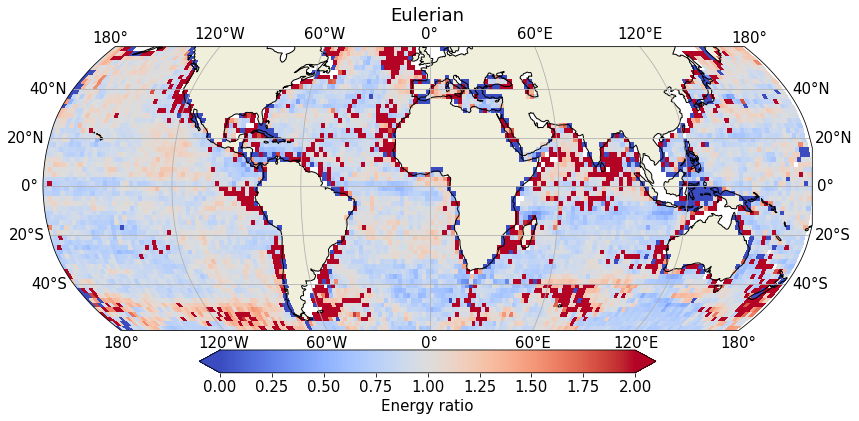

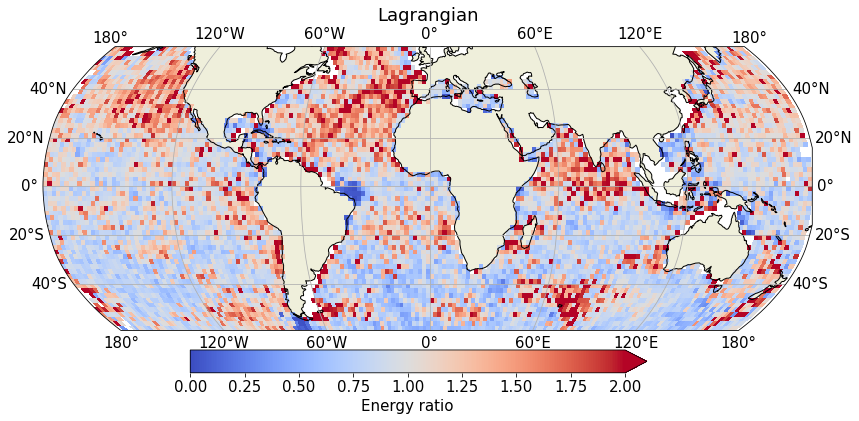

In [277]:
fig = plt.figure(figsize=(15,6))
fig,ax = plot_maps(EeV/dsE.sel(param='U').parameters_SSV,colmap='coolwarm',vlim=(0,2),lat='lat_bins',
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':r'Energy ratio'})
ax.set_title('Eulerian')
#fig.savefig(fig_dir+'EKE_predicted.png')

fig = plt.figure(figsize=(15,6))
fig,ax = plot_maps(ElV/dsL.sel(param='U').parameters_SSV,colmap='coolwarm',vlim=(0,2),lat='lat_bins',
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':r'Energy ratio'})
ax.set_title('Lagrangian')
#fig.savefig(fig_dir+'EKE_predicted.png')

Text(0.5, 1.0, 'Lagrangian')

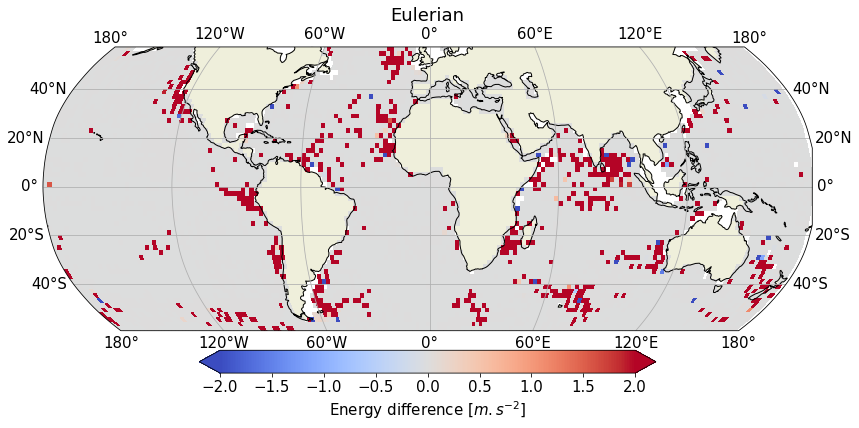

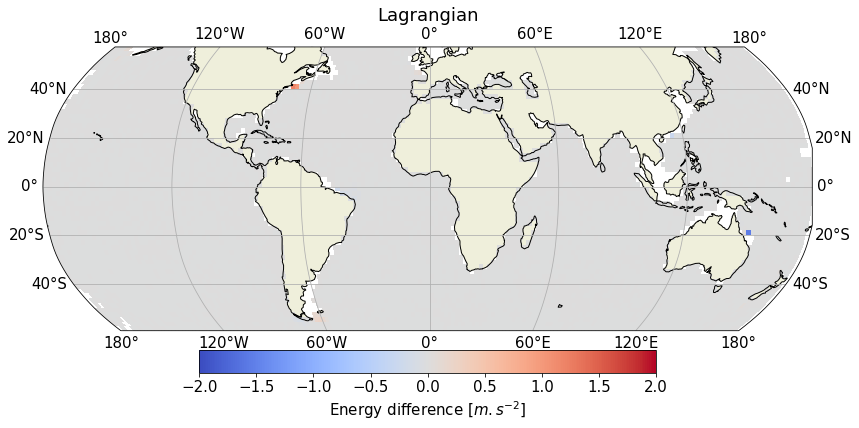

In [278]:
fig = plt.figure(figsize=(15,6))
fig,ax = plot_maps(EeV-dsE.sel(param='U').parameters_SSV,colmap='coolwarm',vlim=(-2,2),lat='lat_bins',
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':r'Energy difference [$m.s^{-2}$]'})
ax.set_title('Eulerian')
#fig.savefig(fig_dir+'EKE_predicted.png')

fig = plt.figure(figsize=(15,6))
fig,ax = plot_maps(ElV-dsL.sel(param='U').parameters_SSV,colmap='coolwarm',vlim=(-2,2),lat='lat_bins',
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':r'Energy difference [$m.s^{-2}$]'})
ax.set_title('Lagrangian')
#fig.savefig(fig_dir+'EKE_predicted.png')

In [32]:
cluster.close()

distributed.client - ERROR - Failed to reconnect to scheduler after 30.00 seconds, closing client
